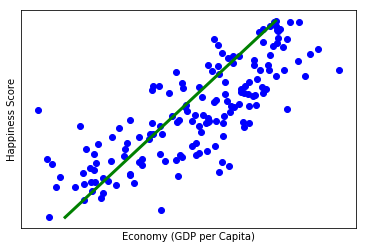

('Coefficients:', array([[ 0.27572117]]))
('Intercept:', array([-0.63646124]))


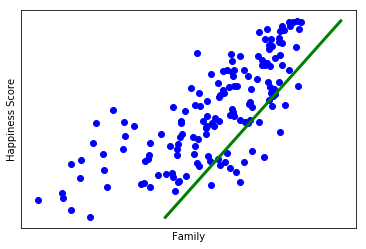

('Coefficients:', array([[ 0.17099539]]))
('Intercept:', array([ 0.07447833]))


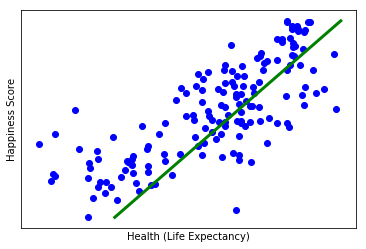

('Coefficients:', array([[ 0.15692038]]))
('Intercept:', array([-0.21363561]))


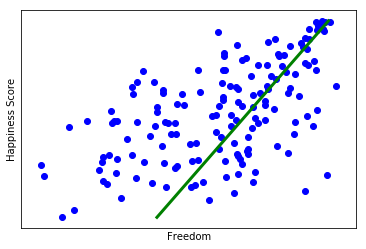

('Coefficients:', array([[ 0.07638981]]))
('Intercept:', array([ 0.01713752]))


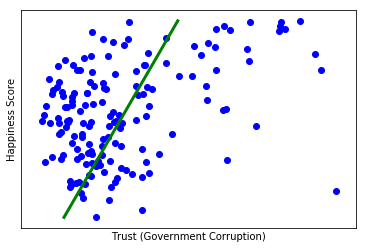

('Coefficients:', array([[ 0.04231296]]))
('Intercept:', array([-0.08449507]))


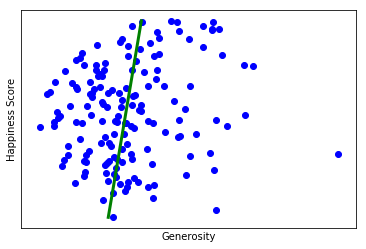

('Coefficients:', array([[ 0.01969608]]))
('Intercept:', array([ 0.13154534]))


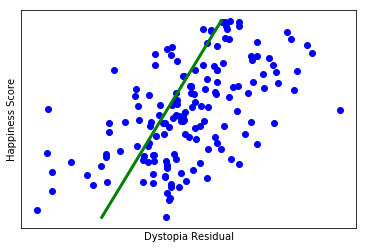

('Coefficients:', array([[ 0.25797676]]))
('Intercept:', array([ 0.71138072]))


In [67]:
# blog post: https://medium.com/@bermanlucy19/what-makes-us-happy-73659cf89a0

import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline
from matplotlib import pyplot as plt

data = pd.read_csv("2015.csv", index_col=0)[:-1]
test = pd.read_csv("2016.csv", index_col=0)

train_xs = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]

# train target
happiness_train = data["Happiness Score"].values.reshape((157, 1))

# test target
happiness_test = test["Happiness Score"].values.reshape((157, 1))

# iterate through each factor and build a regression model to find the correlation between
# each variable with happiness score
for train_x in train_xs:
    # x is the factor that we're investigating to find its correlation with happiness score
    x_train = data[train_x].values.reshape((157, 1))
    x_test = test[train_x].values.reshape((157, 1))
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # train the model using the training sets
    regr.fit(happiness_train, x_train)

    # make predictions using the testing set
    pred = regr.predict(happiness_test)

    # scatterplot for the factor vs. happiness score
    plt.scatter(x_test, happiness_test, color='blue')
    plt.plot(pred, happiness_test, color='green', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.ylabel("Happiness Score")
    plt.xlabel(train_x)

    plt.show()

    print('Coefficients:', regr.coef_)
    print ('Intercept:', regr.intercept_)


In [69]:
import numpy as np
import pandas as pd
from sklearn import linear_model

# load data
d15 = pd.read_csv("2015.csv", index_col=0)
d16 = pd.read_csv("2016.csv", index_col=0)
d17 = pd.read_csv("2017.csv", index_col=0)

# create a target array
happiness_15 = d15["Happiness Score"]
happiness_16 = d16["Happiness Score"]
target = happiness_15.append(happiness_16)
target = pd.DataFrame(target)

# clean out irrelevant data and target data
predictor_15 = d15.drop(['Happiness Rank', 'Happiness Score', 'Region', 'Standard Error'], axis=1)
predictor_16 = d16.drop(['Happiness Rank', 'Happiness Score', 
                'Region', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)

# make predictor matrix
predictor_matrix = predictor_15.append(predictor_16)

# make test set and clean out irrelevant data
test = d17.drop(['Happiness Rank', 'Happiness Score', 'Whisker high', 'Whisker low'], axis=1)

In [70]:
targ = target["Happiness Score"]

# build linear regression model based using all variables
lm = linear_model.LinearRegression()
model = lm.fit(predictor_matrix, targ)

# make predictions on the test set
predictions = lm.predict(test)

In [71]:
# helper function to display 2 tables side by side

from IPython.display import display, HTML, display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [61]:
# display predictions vs. target for comparison
df1 = pd.DataFrame(predictions, columns=['Happiness Score'])
df2 = pd.DataFrame(d17["Happiness Score"], columns=['Happiness Score'])
del df2.index.name # delete index name for readability, nothing too important
display_side_by_side(df1, df2)

,Happiness Score
0,3.793776
1,4.644106
2,5.872150
3,3.794933
4,6.598568
5,4.375563
6,7.283963
7,7.006119
8,5.233701
9,6.087268


In [72]:
print ("These are the coefficients for Economy, Family, Health, Freedom, Trust, Generosity, and Dystopia Residual respectively using a linear regression model that takes into account all these factors to predict the happiness score for each country in 2017.")
lm.coef_

These are the coefficients for Economy, Family, Health, Freedom, Trust, Generosity, and Dystopia Residual respectively using a linear regression model that takes into account all these factors to predict the happiness score for each country in 2017.


array([ 1.00005202,  0.99999745,  0.99985509,  0.99991623,  0.99981726,
        1.00013159,  0.99999028])

In [73]:
print ("This is how well the model performs")
lm.score(X, Y)

This is how well the model performs


0.99999993648343266